In [117]:
import pandas as pd
import numpy as np
import math
import statistics
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, f1_score, auc
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [134]:
df = pd.read_csv("data.csv", encoding ='cp1252')


In [135]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [136]:
#df['InvoiceNo'] = pd.to_numeric(df['InvoiceNo'], errors='coerce')
#df['InvoiceNo'] = df['InvoiceNo'].dropna()
#df['InvoiceNo'] = df['InvoiceNo'].dropna(inplace=True)

In [137]:
df = df.drop('Description', axis=1)
df = df.drop('CustomerID', axis=1)
df = df.drop('InvoiceDate', axis=1)
df = df.drop('StockCode', axis=1)
df = df.drop('InvoiceNo', axis=1)
df['UnitPrice'] = df['UnitPrice'].round().astype(int)

1.How are you handling nulls? What process(es) are you using to encode and normalize the data?

Description has 1454 nulls, dropping the data so it can be cleaner w/o str values. 

Customer ID has 135080 nulls, dropping them since the Id won't have too much effect on the data. 

Invoice Date is slightly complicated with the slashes and I dont think it'll effect the data if dropped.

Rounding the Unit Price to Int hopefully for better compilation. 

Dropping Stock Code since I dont think it matters

Had to drop InvoiceNo since it was a pain to both preprocess and get into KMeans. 

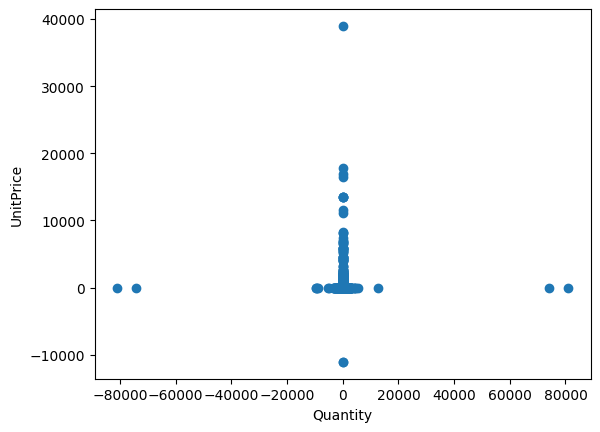

In [138]:
X = df.drop('Country', axis=1)
y = df['Country']

plt.scatter(X['Quantity'],X['UnitPrice'])

plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.show()

In [139]:
print(X)

        Quantity  UnitPrice
0              6          3
1              6          3
2              8          3
3              6          3
4              6          3
...          ...        ...
541904        12          1
541905         6          2
541906         4          4
541907         4          4
541908         3          5

[541909 rows x 2 columns]


In [140]:
inertias = []
distortions = []

for k in range(1,10):
    model = KMeans(n_clusters=k).fit(X)
    
    distance = cdist(X, model.cluster_centers_,
                     'euclidean')
    distortion = sum(np.min(distance, axis=1))/X.shape[0]
    distortions.append(distortion)

    inertia = model.inertia_
    inertias.append(inertia)

Text(0.5, 1.0, 'Elbow Method with Distortion')

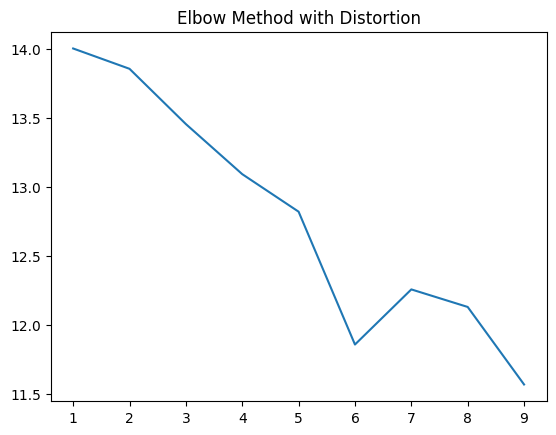

In [141]:
plt.plot(range(1,10), distortions)
plt.title('Elbow Method with Distortion')

Text(0.5, 1.0, 'Elbow Method with Inertia')

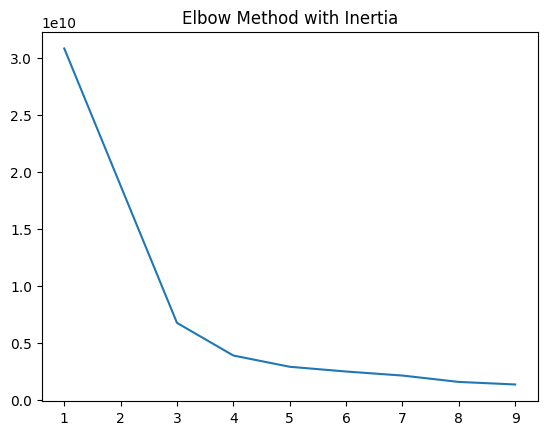

In [142]:
plt.plot(range(1,10), inertias)
plt.title('Elbow Method with Inertia')

2. Should you look at all the data, or which subset of data should you use? What is the ideal number of clusters? Which approach did you use to find the ideal number of clusters and why?

I think that we should look at a decent amount of data that can be thoroughly preprocessed and changed to fit within the KMeans model. In the data above there's a lot of turning points and elbows, showing the different amount of clusters or data that can be found. While I can't for sure know how many to use for this particular data set, and I also got rid of tons of data during preprocessing, due to all of the changes I think we cna look to the varaince of the data, with the scatter plot above. Theres a couple outliers and the data's in a t-like shape, which means the data is formatted in a certain way. 

In [145]:
from scipy.cluster.hierarchy import dendrogram, linkage
linked = linkage(X, 'ward')
plt.figure(figsize=(10,7))

dendro = dendrogram(linked, labels = list(y))

MemoryError: Unable to allocate 1.07 TiB for an array with shape (146832411186,) and data type float64

4. Compare the results of 2 and 3. Which approach do you think is best? Why?

From my code the data is far too much for my processor to handle, leading it to the error above. So for this case I think the first approach is better because it's able to handle the amount of data given. With the first approach it's able to handle both the data and give out the scatterplot based on the preprocessing. 